In [ ]:
raw_text = ['Story of a man who has unnatural feelings for a pig.  <br>  Starts out with a opening scene that is a terrific example of absurd comedy. ',
          "A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers." ,
          'Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. ',
          'Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader.',
          "On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond.",
          'Future stars Sally Kirkland and Frederic Forrest can be seen briefly.',
          "I've seen this story before but my kids haven't." ,
          'Boy with troubled past joins military, faces his past, falls in love and becomes a man. ',
          'The mentor this time is played perfectly by Kevin Costner; An ordinary man with common everyday problems who lives an extraordinary conviction, to save lives.',
          'After losing his team he takes a teaching position training the next generation of heroes.',
          'The young troubled recruit is played by Kutcher.',
          "While his scenes with the local love interest are a tad stiff and don't generate enough heat to melt butter, he compliments Costner well.",
          'I never really understood Sela Ward as the neglected wife and felt she should of wanted Costner to quit out of concern for his safety as opposed to her selfish needs.',
          'But her presence on screen is a pleasure. The two unaccredited stars of this movie are the Coast Guard and the Sea.',
          'Both powerful forces which should not be taken for granted in real life or this movie.',
          'The movie has some slow spots and could have used the wasted 15 minutes to strengthen the character relationships.',
          'But it still works. The rescue scenes are intense and well filmed and edited to provide maximum impact.',
          'This movie earns the audience applause. And the applause of my two sons.']

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# tqdm to show progress bar
import tqdm
print(tqdm.__version__)
tqdm.tqdm.pandas() # use progress_apply to replace apply
from tqdm.notebook import tqdm

# example 1: for loop
for i in tqdm(range(10)):
    pass
# example 2: pandas
df_test = pd.DataFrame({'num': [0,1]})
df_test['num+1'] = df_test.num.progress_apply(lambda x: x+1)

4.41.1


100%|██████████| 2/2 [00:00<00:00, 358.78it/s]

In [ ]:
# store in dataframe
df_text = pd.DataFrame({'raw_text': raw_text})
df_text.head()

,raw_text
0,Story of a man who has unnatural feelings for ...
1,A formal orchestra audience is turned into an ...
2,Unfortunately it stays absurd the WHOLE time w...
3,Even those from the era should be turned off. ...
4,On a technical level it's better than you migh...


## Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(raw_text)
train_sequences = tokenizer.texts_to_sequences(raw_text) #Converting text to a vector of word indexes
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print('1st token-id sequnce', train_sequences[0])

Found 212 unique tokens.
1st token-id sequnce [21, 4, 2, 12, 22, 23, 50, 51, 13, 2, 52, 53, 54, 24, 6, 2, 55, 56, 57, 7, 2, 58, 59, 4, 25, 60]


In [ ]:
# use tokenizer.num_words to reset tokens to take
MAX_NUM_TOKENS = 50
tokenizer.num_words = MAX_NUM_TOKENS
print(tokenizer.num_words)
tokenizer.num_words = None
print(tokenizer.num_words)
# tokenizer.num_words = -1
# print(tokenizer.num_words)

50
None


In [ ]:
# display the token dictionary (from most freqent to rarest)
# Your PC might freeze if the dictionary is huge
# these are the 2 useful attributes
print(tokenizer.word_index)
print(tokenizer.word_counts)
# tokenizer.get_config()

{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5, 'with': 6, 'is': 7, 'this': 8, 'by': 9, 'his': 10, 'movie': 11, 'man': 12, 'for': 13, 'an': 14, 'it': 15, 'should': 16, 'be': 17, 'but': 18, 'costner': 19, 'are': 20, 'story': 21, 'who': 22, 'has': 23, 'out': 24, 'absurd': 25, 'audience': 26, 'turned': 27, "it's": 28, 'time': 29, 'off': 30, 'on': 31, 'some': 32, 'future': 33, 'stars': 34, 'seen': 35, 'my': 36, 'troubled': 37, 'past': 38, 'in': 39, 'love': 40, 'played': 41, 'lives': 42, 'he': 43, 'scenes': 44, 'well': 45, 'as': 46, 'her': 47, 'two': 48, 'applause': 49, 'unnatural': 50, 'feelings': 51, 'pig': 52, 'br': 53, 'starts': 54, 'opening': 55, 'scene': 56, 'that': 57, 'terrific': 58, 'example': 59, 'comedy': 60, 'formal': 61, 'orchestra': 62, 'into': 63, 'insane': 64, 'violent': 65, 'mob': 66, 'crazy': 67, 'chantings': 68, 'singers': 69, 'unfortunately': 70, 'stays': 71, 'whole': 72, 'no': 73, 'general': 74, 'narrative': 75, 'eventually': 76, 'making': 77, 'just': 78, 'too': 79, 'put

In [ ]:
tokenizer.get_config()

{'char_level': False,
 'document_count': 18,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'index_docs': '{"56": 1, "53": 1, "51": 1, "4": 6, "59": 1, "13": 3, "55": 1, "50": 1, "60": 1, "52": 1, "54": 1, "2": 8, "7": 5, "57": 1, "22": 2, "58": 1, "6": 6, "21": 2, "25": 2, "12": 3, "23": 2, "24": 2, "63": 1, "14": 2, "9": 4, "65": 1, "67": 1, "26": 2, "69": 1, "66": 1, "27": 2, "28": 2, "61": 1, "1": 12, "64": 1, "68": 1, "62": 1, "78": 1, "15": 2, "74": 1, "72": 1, "77": 1, "29": 2, "71": 1, "79": 1, "30": 2, "80": 1, "75": 1, "70": 1, "73": 1, "76": 1, "82": 1, "17": 3, "86": 1, "90": 1, "87": 1, "91": 1, "89": 1, "5": 6, "93": 1, "92": 1, "81": 1, "84": 1, "83": 1, "16": 3, "88": 1, "85": 1, "96": 1, "104": 1, "31": 2, "99": 1, "95": 1, "98": 1, "102": 1, "32": 2, "33": 2, "105": 1, "97": 1, "94": 1, "100": 1, "103": 1, "101": 1, "110": 1, "106": 1, "107": 1, "108": 1, "34": 2, "3": 8, "111": 1, "35": 2, "109": 1, "115": 1, "113": 1, "36": 2, "112": 1, "8": 5, "18": 3, "114":

In [ ]:
# store in data frame
df_index_word = pd.Series(tokenizer.index_word).reset_index()
df_index_word.columns=['token_index','token',]
df_index_word.head()

,token_index,token
0,1,the
1,2,a
2,3,and
3,4,of
4,5,to


In [ ]:
# show that the token-id/token-index is sorted by count (but if count number are the same, it might end up random)
df_token_by_count = pd.DataFrame(tokenizer.word_counts.items())
df_token_by_count.columns=['token', 'count']
df_token_by_count = pd.merge(df_index_word, df_token_by_count,
                            on='token',
                            how='left')
df_token_by_count.head()

,token_index,token,count
0,1,the,18
1,2,a,11
2,3,and,9
3,4,of,8
4,5,to,7


In [ ]:
# compare the number of tokens and tokens after cut-off
train_sequences = tokenizer.texts_to_sequences(raw_text) #Converting text to a vector of word indexes
# print(len(text_to_word_sequence(raw_text[0])), len(train_sequences[0]))
print(raw_text[0])
print(text_to_word_sequence(raw_text[0]))
print()
tokenizer.num_words = None # take all the tokens
print(tokenizer.texts_to_sequences(raw_text)[0])
tokenizer.num_words = 50 # take the top 50-1 tokens
print(tokenizer.texts_to_sequences(raw_text)[0])


Story of a man who has unnatural feelings for a pig.  <br>  Starts out with a opening scene that is a terrific example of absurd comedy. 
['story', 'of', 'a', 'man', 'who', 'has', 'unnatural', 'feelings', 'for', 'a', 'pig', 'br', 'starts', 'out', 'with', 'a', 'opening', 'scene', 'that', 'is', 'a', 'terrific', 'example', 'of', 'absurd', 'comedy']

[21, 4, 2, 12, 22, 23, 50, 51, 13, 2, 52, 53, 54, 24, 6, 2, 55, 56, 57, 7, 2, 58, 59, 4, 25, 60]
[21, 4, 2, 12, 22, 23, 13, 2, 24, 6, 2, 7, 2, 4, 25]


In [ ]:
# OOV demo
test_sequence = ['Storys of a woman...'] 
print(test_sequence)
print(text_to_word_sequence(test_sequence[0]))
print(tokenizer.texts_to_sequences(test_sequence))

['Storys of a woman...']
['storys', 'of', 'a', 'woman']
[[4, 2]]


In [ ]:
# display the token-id and associated token
df_word_index = pd.Series(word_index).reset_index()
df_word_index.columns=['token','token_index']
# df_word_index
df_check = pd.merge(pd.DataFrame({'token_index':train_sequences[0]}),
        df_word_index,
        on='token_index',
        how='left')
df_check.values

array([[21, 'story'],
       [4, 'of'],
       [2, 'a'],
       [12, 'man'],
       [22, 'who'],
       [23, 'has'],
       [50, 'unnatural'],
       [51, 'feelings'],
       [13, 'for'],
       [2, 'a'],
       [52, 'pig'],
       [53, 'br'],
       [54, 'starts'],
       [24, 'out'],
       [6, 'with'],
       [2, 'a'],
       [55, 'opening'],
       [56, 'scene'],
       [57, 'that'],
       [7, 'is'],
       [2, 'a'],
       [58, 'terrific'],
       [59, 'example'],
       [4, 'of'],
       [25, 'absurd'],
       [60, 'comedy']], dtype=object)

In [ ]:
# check what is not in the final tokenized sequence
df_check_2 = pd.merge(pd.DataFrame({'token':text_to_word_sequence(raw_text[0])}),
                     df_word_index,
                     on='token',
#          right_on='token',
                      how='left')
df_check_2[df_check_2.token_index>=MAX_NUM_TOKENS]

,token,token_index
6,unnatural,50
7,feelings,51
10,pig,52
11,br,53
12,starts,54
16,opening,55
17,scene,56
18,that,57
21,terrific,58
22,example,59


In [ ]:
# updata df_text
df_text['token_sequence'] = df_text.raw_text.progress_apply(lambda x: tokenizer.texts_to_sequences([x])[0])
df_text.head()

100%|██████████| 18/18 [00:00<00:00, 7752.08it/s]


,raw_text,token_sequence
0,Story of a man who has unnatural feelings for ...,"[21, 4, 2, 12, 22, 23, 13, 2, 24, 6, 2, 7, 2, ..."
1,A formal orchestra audience is turned into an ...,"[2, 26, 7, 27, 14, 9, 1, 4, 28]"
2,Unfortunately it stays absurd the WHOLE time w...,"[15, 25, 1, 29, 6, 15, 30]"
3,Even those from the era should be turned off. ...,"[1, 16, 17, 27, 30, 1, 5, 2]"
4,On a technical level it's better than you migh...,"[31, 2, 28, 6, 32, 9, 33]"


## Next, Paddding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
print(type(train_sequences))
train_sequences

<class 'list'>


[[21,
  4,
  2,
  12,
  22,
  23,
  50,
  51,
  13,
  2,
  52,
  53,
  54,
  24,
  6,
  2,
  55,
  56,
  57,
  7,
  2,
  58,
  59,
  4,
  25,
  60],
 [2, 61, 62, 26, 7, 27, 63, 14, 64, 65, 66, 9, 1, 67, 68, 4, 28, 69],
 [70, 15, 71, 25, 1, 72, 29, 6, 73, 74, 75, 76, 77, 15, 78, 79, 30, 80],
 [81,
  82,
  83,
  1,
  84,
  16,
  17,
  27,
  30,
  1,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  5,
  2,
  92,
  93],
 [31,
  2,
  94,
  95,
  28,
  96,
  97,
  98,
  99,
  100,
  6,
  32,
  101,
  102,
  9,
  33,
  103,
  104,
  105],
 [33, 34, 106, 107, 3, 108, 109, 110, 17, 35, 111],
 [112, 35, 8, 21, 113, 18, 36, 114, 115],
 [116, 6, 37, 38, 117, 118, 119, 10, 38, 120, 39, 40, 3, 121, 2, 12],
 [1,
  122,
  8,
  29,
  7,
  41,
  123,
  9,
  124,
  19,
  14,
  125,
  12,
  6,
  126,
  127,
  128,
  22,
  42,
  14,
  129,
  130,
  5,
  131,
  42],
 [132, 133, 10, 134, 43, 135, 2, 136, 137, 138, 1, 139, 140, 4, 141],
 [1, 142, 37, 143, 7, 41, 9, 144],
 [145,
  10,
  44,
  6,
  1,
  146,
  40,
 

100%|██████████| 18/18 [00:00<00:00, 8836.31it/s]

sequence_length mean:  9.222222222222221
sequence_length median:  8.5


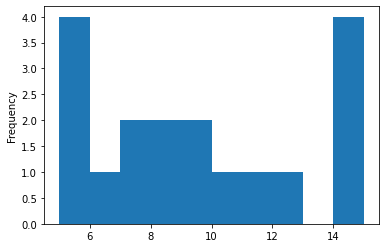

In [ ]:
# ckeck sequence_length stats
length_check = df_text.token_sequence.progress_apply(lambda x: len(x))
print('sequence_length mean: ', length_check.mean())
print('sequence_length median: ', length_check.median())
length_check.plot.hist()

In [ ]:
# padding (pre)
MAX_SEQUENCE_LENGTH = 10 # length of the sequence
trainvalid_data_pre = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, 
                                padding='pre',
                                truncating='pre',)
trainvalid_data_pre

array([[ 55,  56,  57,   7,   2,  58,  59,   4,  25,  60],
       [ 64,  65,  66,   9,   1,  67,  68,   4,  28,  69],
       [ 73,  74,  75,  76,  77,  15,  78,  79,  30,  80],
       [ 86,  87,  88,  89,  90,  91,   5,   2,  92,  93],
       [100,   6,  32, 101, 102,   9,  33, 103, 104, 105],
       [ 34, 106, 107,   3, 108, 109, 110,  17,  35, 111],
       [  0, 112,  35,   8,  21, 113,  18,  36, 114, 115],
       [119,  10,  38, 120,  39,  40,   3, 121,   2,  12],
       [127, 128,  22,  42,  14, 129, 130,   5, 131,  42],
       [135,   2, 136, 137, 138,   1, 139, 140,   4, 141],
       [  0,   0,   1, 142,  37, 143,   7,  41,   9, 144],
       [151, 152, 153,   5, 154, 155,  43, 156,  19,  45],
       [169,  13,  10, 170,  46, 171,   5,  47, 172, 173],
       [  4,   8,  11,  20,   1, 178, 179,   3,   1, 180],
       [ 17, 186,  13, 187,  39, 188, 189, 190,   8,  11],
       [195,   1, 196, 197, 198,   5, 199,   1, 200, 201],
       [205,   3,  45, 206,   3, 207,   5, 208, 209, 210

In [ ]:
# padding (post), recommended for RNN
MAX_SEQUENCE_LENGTH = 10
trainvalid_data_post = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, 
                                padding='post',
                                truncating='post',)
trainvalid_data_post

array([[ 21,   4,   2,  12,  22,  23,  50,  51,  13,   2],
       [  2,  61,  62,  26,   7,  27,  63,  14,  64,  65],
       [ 70,  15,  71,  25,   1,  72,  29,   6,  73,  74],
       [ 81,  82,  83,   1,  84,  16,  17,  27,  30,   1],
       [ 31,   2,  94,  95,  28,  96,  97,  98,  99, 100],
       [ 33,  34, 106, 107,   3, 108, 109, 110,  17,  35],
       [112,  35,   8,  21, 113,  18,  36, 114, 115,   0],
       [116,   6,  37,  38, 117, 118, 119,  10,  38, 120],
       [  1, 122,   8,  29,   7,  41, 123,   9, 124,  19],
       [132, 133,  10, 134,  43, 135,   2, 136, 137, 138],
       [  1, 142,  37, 143,   7,  41,   9, 144,   0,   0],
       [145,  10,  44,   6,   1, 146,  40, 147,  20,   2],
       [157, 158, 159, 160, 161, 162,  46,   1, 163, 164],
       [ 18,  47, 174,  31, 175,   7,   2, 176,   1,  48],
       [181, 182, 183, 184,  16, 185,  17, 186,  13, 187],
       [  1,  11,  23,  32, 191, 192,   3, 193, 194, 195],
       [ 18,  15, 202, 203,   1, 204,  44,  20, 205,   3

In [ ]:
# padding dataframe
df_text['padding'] = df_text.token_sequence.progress_apply(lambda x: \
                            pad_sequences([x], maxlen=MAX_SEQUENCE_LENGTH, 
                            padding='post',
                            truncating='post',)[0])
df_text.head()

100%|██████████| 18/18 [00:00<00:00, 11273.33it/s]


,raw_text,token_sequence,padding
0,Story of a man who has unnatural feelings for ...,"[21, 4, 2, 12, 22, 23, 13, 2, 24, 6, 2, 7, 2, ...","[21, 4, 2, 12, 22, 23, 13, 2, 24, 6]"
1,A formal orchestra audience is turned into an ...,"[2, 26, 7, 27, 14, 9, 1, 4, 28]","[2, 26, 7, 27, 14, 9, 1, 4, 28, 0]"
2,Unfortunately it stays absurd the WHOLE time w...,"[15, 25, 1, 29, 6, 15, 30]","[15, 25, 1, 29, 6, 15, 30, 0, 0, 0]"
3,Even those from the era should be turned off. ...,"[1, 16, 17, 27, 30, 1, 5, 2]","[1, 16, 17, 27, 30, 1, 5, 2, 0, 0]"
4,On a technical level it's better than you migh...,"[31, 2, 28, 6, 32, 9, 33]","[31, 2, 28, 6, 32, 9, 33, 0, 0, 0]"


## word embedding, use pre-trained model (SpaCy)

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy
import en_core_web_sm
import en_core_web_md
# import en_core_web_lg
nlp_sm = en_core_web_sm.load()
nlp_md = en_core_web_md.load()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [ ]:
doc = nlp_sm("elephant")
print(doc.vector.size)
doc.vector

96


array([ 1.53254330e+00, -1.54785204e+00,  1.21842146e-01, -1.37487340e+00,
        3.12817001e+00,  6.84519172e-01,  1.58269787e+00,  3.88548374e-02,
       -9.69716012e-01,  2.60367632e-01,  4.42843914e+00,  1.69279790e+00,
        1.80086970e+00, -1.42933702e+00,  2.76753664e-01,  9.96531248e-01,
       -1.20114398e+00,  2.58879042e+00, -3.98730934e-01, -1.90679169e+00,
        1.01322341e+00, -8.79096389e-01, -5.02925992e-01, -1.68987930e+00,
        1.02189422e+00, -1.85433960e+00,  1.87317526e+00, -3.93670797e+00,
        2.55938601e+00, -1.11078441e+00,  1.25108194e+00,  9.47929144e-01,
        1.61773515e+00,  1.19842112e+00,  2.17329383e+00, -3.79276681e+00,
        1.10712552e+00, -2.24094629e+00, -2.76005244e+00, -1.21360254e+00,
        7.17294931e-01, -4.69020307e-01, -1.43317056e+00, -3.81187248e+00,
        3.76251817e-01,  1.27198040e-01,  1.40854716e-03,  4.05545503e-01,
       -9.77936983e-01,  2.86920214e+00,  1.34740186e+00, -2.05546427e+00,
        7.06032991e-01, -

In [ ]:
# similarity demo1
word1 = "elephant"
word2 = "big"
# print("similariy {}-{}: {}".format(word1, word2, nlp_md(word1).similarity(nlp_md(word2))) )
print("cosine_similarity {}-{}: {}".format(word1, word2, cosine_similarity([nlp_md(word1).vector], [nlp_md(word2).vector])))
print("euclidean_distances{}-{}: {}".format(word1, word2, euclidean_distances([nlp_md(word1).vector], [nlp_md(word2).vector])))
print()

word1 = "mouse"
word2 = "big"
# print("similariy {}-{}: {}".format(word1, word2, nlp_md(word1).similarity(nlp_md(word2))) )
print("cosine_similarity {}-{}: {}".format(word1, word2, cosine_similarity([nlp_md(word1).vector], [nlp_md(word2).vector])))
print("euclidean_distances{}-{}: {}".format(word1, word2, euclidean_distances([nlp_md(word1).vector], [nlp_md(word2).vector])))
print()

word1 = "mouse"
word2 = "small"
# print("similariy {}-{}: {}".format(word1, word2, nlp_md(word1).similarity(nlp_md(word2))) )
print("cosine_similarity {}-{}: {}".format(word1, word2, cosine_similarity([nlp_md(word1).vector], [nlp_md(word2).vector])))
print("euclidean_distances{}-{}: {}".format(word1, word2, euclidean_distances([nlp_md(word1).vector], [nlp_md(word2).vector])))
print()

cosine_similarity elephant-big: [[0.35897797]]
euclidean_distanceselephant-big: [[6.900712]]

cosine_similarity mouse-big: [[0.17815787]]
euclidean_distancesmouse-big: [[8.3890705]]

cosine_similarity mouse-small: [[0.32656005]]
euclidean_distancesmouse-small: [[7.6220174]]



In [ ]:
# similarity demo2
word1 = "elephant"
word2 = "rock"
print("similariy {}-{}: {}".format(word1, word2, nlp_md(word1).similarity(nlp_md(word2))) )

word1 = "mouse"
word2 = "elephant"
print("similariy {}-{}: {}".format(word1, word2, nlp_md(word1).similarity(nlp_md(word2))) )

word1 = "mouse"
word2 = "rock"
print("similariy {}-{}: {}".format(word1, word2, nlp_md(word1).similarity(nlp_md(word2))) )

word1 = "mouse"
word2 = "pebble"
print("similariy {}-{}: {}".format(word1, word2, nlp_md(word1).similarity(nlp_md(word2))) )


similariy elephant-rock: 0.23465476998562218
similariy mouse-elephant: 0.3079661746915687
similariy mouse-rock: 0.11835070985447328
similariy mouse-pebble: 0.18301520085660278


In [ ]:
# similarity demo3
word1 = "mouse"
word2 = "house"
print("similariy {}-{}: {}".format(word1, word2, nlp_md(word1).similarity(nlp_md(word2))) )

word1 = "elephant"
word2 = "house"
print("similariy {}-{}: {}".format(word1, word2, nlp_md(word1).similarity(nlp_md(word2))) )

similariy mouse-house: 0.16095256988349818
similariy elephant-house: 0.2828021219183604


In [ ]:
# update token dictionary
df_index_word = pd.Series(tokenizer.index_word)
# df_index_word
df_index_word_valid = df_index_word[:MAX_NUM_TOKENS-1]
df_index_word_valid = pd.Series(["NAN"]).append(df_index_word_valid)
df_index_word_valid = df_index_word_valid.reset_index()
# df_index_word_valid.head()
df_index_word_valid.columns = ['token_id', 'token']
# df_index_word_valid.head()
df_index_word_valid['word2vec'] = df_index_word_valid.token.progress_apply(lambda x: nlp_sm(x).vector)
df_index_word_valid['is_oov'] = df_index_word_valid.token.progress_apply(lambda x: nlp_sm(x)[0].is_oov)
df_index_word_valid.at[0, "word2vec"] = np.zeros_like(df_index_word_valid.at[0, "word2vec"])
df_index_word_valid.head()

100%|██████████| 50/50 [00:00<00:00, 132.01it/s]


,token_id,token,word2vec,is_oov
0,0,NAN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
1,1,the,"[-1.6740144, -1.8919091, 2.7896621, -2.1180558...",True
2,2,a,"[1.3639276, -2.4362004, 4.93911, -2.0180569, 1...",True
3,3,and,"[-0.3471796, 4.5575933, 4.6196766, 1.9879136, ...",True
4,4,of,"[1.2207265, 1.6008487, 4.8744106, 0.5452882, 2...",True


In [ ]:
# OOV demo
# nlp = spacy.load("en_core_web_md")
tokens_sm = nlp_sm("dog cat banana afskfsd")

for token in tokens_sm:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)
tokens_sm[-1].vector[:10]



dog True 19.266302 True
cat True 19.220264 True
banana True 17.748499 True
afskfsd True 20.882006 True


array([-0.27530098, -2.7509127 ,  0.4392979 ,  1.2666237 ,  0.13736498,
        2.932058  ,  0.29882324,  0.22640565,  0.9685922 , -0.8940778 ],
      dtype=float32)

In [ ]:
# OOV demo
# nlp = spacy.load("en_core_web_md")
tokens_md = nlp_md("dog cat banana afskfsd")

for token in tokens_md:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)    
tokens_md[-1].vector[:10]

dog True 7.0336733 False
cat True 6.6808186 False
banana True 6.700014 False
afskfsd False 0.0 True


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Embbeding matrix

In [ ]:
# Embbeding matrix
embedding_matrix = np.array([vec for vec in tqdm(df_index_word_valid.word2vec.values)])
embedding_matrix[1:3]

array([[-1.6740144 , -1.8919091 ,  2.7896621 , -2.1180558 ,  2.7658477 ,
         0.40291154,  1.9226389 , -1.9946572 , -0.25386387, -3.1599557 ,
        -1.1804683 , -0.2115821 , -0.16796485,  1.6671079 , -1.191205  ,
        -1.1840836 , -0.84644413, -0.80139714, -0.08505598, -1.9580033 ,
        -0.81525314,  0.2681221 , -1.8158246 , -1.8130839 , -0.04797906,
        -2.9620476 , -2.4702177 ,  0.32404464,  0.65950954, -0.06304374,
         0.0607968 ,  1.528122  , -0.11225557,  2.8844306 ,  1.1058623 ,
        -2.6249275 ,  1.0343542 ,  0.5337491 ,  1.9547801 ,  2.218318  ,
        -2.2857184 ,  1.0185624 ,  1.7423658 ,  0.80492026,  0.25125942,
        -1.0720794 ,  1.262687  , -0.7903186 , -2.0943189 ,  2.6549568 ,
         0.7887018 , -3.6813874 , -1.1736808 ,  0.5782918 , -0.42717618,
         1.0743806 ,  3.5691    ,  3.1414604 , -0.6959189 , -2.0594609 ,
         3.2260387 ,  4.945283  , -0.5519747 , -0.41363585, -1.1572365 ,
        -2.6275635 ,  2.8912182 , -0.93990165, -2.1

In [ ]:
print(embedding_matrix.shape)

(50, 96)


# Padding

# tf embedding layer

In [ ]:
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Embedding

In [ ]:
# MAX_NUM_TOKENS = 50
EMBEDDING_DIM = embedding_matrix.shape[1]
# MAX_SEQUENCE_LENGTH = 10
embedding_layer = Embedding(input_dim=MAX_NUM_TOKENS,
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            mask_zero=True,
                            trainable=False)

In [ ]:
# input transform format
pad_sequences = np.array([sequence for sequence in tqdm(df_text.padding.values)])
pad_sequences

array([[21,  4,  2, 12, 22, 23, 13,  2, 24,  6],
       [ 2, 26,  7, 27, 14,  9,  1,  4, 28,  0],
       [15, 25,  1, 29,  6, 15, 30,  0,  0,  0],
       [ 1, 16, 17, 27, 30,  1,  5,  2,  0,  0],
       [31,  2, 28,  6, 32,  9, 33,  0,  0,  0],
       [33, 34,  3, 17, 35,  0,  0,  0,  0,  0],
       [35,  8, 21, 18, 36,  0,  0,  0,  0,  0],
       [ 6, 37, 38, 10, 38, 39, 40,  3,  2, 12],
       [ 1,  8, 29,  7, 41,  9, 19, 14, 12,  6],
       [10, 43,  2,  1,  4,  0,  0,  0,  0,  0],
       [ 1, 37,  7, 41,  9,  0,  0,  0,  0,  0],
       [10, 44,  6,  1, 40, 20,  2,  3,  5, 43],
       [46,  1,  3, 16,  4, 19,  5, 24,  4, 13],
       [18, 47, 31,  7,  2,  1, 48, 34,  4,  8],
       [16, 17, 13, 39,  8, 11,  0,  0,  0,  0],
       [ 1, 11, 23, 32,  3,  1,  5,  1,  0,  0],
       [18, 15,  1, 44, 20,  3, 45,  3,  5,  0],
       [ 8, 11,  1, 26, 49,  3,  1, 49,  4, 36]], dtype=int32)

In [ ]:
# output shape
# from tensorflow import convert_to_tensor
# embedding_output = embedding_layer(convert_to_tensor(pad_sequences)) # optional for tf 2.x
embedding_output = embedding_layer(pad_sequences)
# result = embedding_layer(inputs=trainvalid_data_post[0])
print(trainvalid_data_post.shape)
embedding_output.shape

(18, 10)


TensorShape([18, 10, 96])

In [ ]:
print(trainvalid_data_post[1])
embedding_output[1]

[ 2 61 62 26  7 27 63 14 64 65]


<tf.Tensor: shape=(10, 96), dtype=float32, numpy=
array([[ 1.36392760e+00, -2.43620038e+00,  4.93910980e+00,
        -2.01805687e+00,  1.52170420e+00, -1.40219402e+00,
         4.75772429e+00, -2.50623226e-01, -1.49177563e+00,
        -2.45218658e+00, -1.27604902e+00, -1.30939591e+00,
        -1.08582544e+00, -6.71670139e-01, -1.09385586e+00,
        -1.28649044e+00, -2.70102262e+00,  5.92373610e-01,
         2.10287523e+00, -3.21028876e+00, -1.46384645e+00,
         3.03815842e+00,  1.93766102e-01, -2.95015931e+00,
        -1.12144828e+00, -2.01309156e+00, -1.93556333e+00,
         2.07509995e-02,  2.34045148e+00,  4.02665734e-02,
         5.70724607e-01,  1.41508186e+00,  3.99731636e-01,
         2.04394388e+00,  1.27683890e+00, -3.08950949e+00,
         4.00990343e+00,  2.99110055e-01,  1.02794504e+00,
         2.81557393e+00, -2.18416595e+00, -4.47245508e-01,
         1.32549953e+00,  1.77888203e+00,  6.86445236e-02,
         5.88078797e-01,  1.81148195e+00,  7.73074389e-01,
      

In [ ]:
# check
print(embedding_matrix[2])
print(embedding_output[1][0])

[ 1.3639276  -2.4362004   4.93911    -2.0180569   1.5217042  -1.402194
  4.7577243  -0.25062323 -1.4917756  -2.4521866  -1.276049   -1.3093959
 -1.0858254  -0.67167014 -1.0938559  -1.2864904  -2.7010226   0.5923736
  2.1028752  -3.2102888  -1.4638464   3.0381584   0.1937661  -2.9501593
 -1.1214483  -2.0130916  -1.9355633   0.020751    2.3404515   0.04026657
  0.5707246   1.4150819   0.39973164  2.043944    1.2768389  -3.0895095
  4.0099034   0.29911005  1.027945    2.815574   -2.184166   -0.4472455
  1.3254995   1.778882    0.06864452  0.5880788   1.811482    0.7730744
 -1.7234092   5.4996524   0.12350267 -4.526079   -1.9351692   0.79747844
 -1.9937111   3.0747123   3.2898862  -1.2227399   1.2424335  -0.57622683
  1.2778368   4.9590282   0.6718544  -2.3315613  -0.8126818  -1.1441078
  2.56817    -0.8662305  -3.233226   -3.9556065  -1.9299409  -0.29795688
  1.5369564   1.5050672  -2.4184477  -0.4063188  -0.80276114  0.64950657
 -1.7719977  -0.16019273  0.83855665 -2.2610872   2.4838014 

In [ ]:
print(embedding_matrix[26])
print(embedding_output[1][1])

[-0.02667493  0.02712947 -0.52140975 -1.2122002   1.9806645   2.8224418
  3.59089     0.7676063   1.6250793   2.6543105   3.9867003  -1.2007122
  3.735116   -2.901899    1.263808    0.22502655 -0.74813443  2.0611222
 -1.8619318  -1.2527559   0.6434767   0.3753251  -0.38927418 -0.99316335
 -0.1664238   1.7456719   1.7081966  -1.4897225   3.2593057  -1.4317417
  1.3258004   0.25987482 -0.8375909   1.8391478   3.5688353  -2.5691366
  1.0060377   1.0213228  -3.9515352   0.98927253  3.4900365   0.8164853
 -1.9785689  -3.207472   -1.3412397  -0.78585035  0.13200724 -2.981964
 -2.35158     2.045514    0.8303373  -0.5554712  -0.6039055  -1.3674781
 -1.1646913   0.889627    0.5447223   0.565897   -0.28678954 -1.663604
  1.570518   -2.129882    0.37795347 -1.6328102  -0.13172239 -0.9532585
  1.6231287  -4.117493   -1.7641671  -0.6890385  -0.3086818   0.44739038
  2.5855176  -0.05758116 -1.7398558  -1.895988    0.6580272  -1.3203626
 -2.5437446   1.3330004   0.3710615  -1.5996593  -0.9437195  -0.

# wrap it up: full neural network architecture and training demo

In [ ]:
# randomly assign some values for demonstration purpose
np.random.seed(0)
y_train = np.random.choice(2, len(pad_sequences))
y_train

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

In [ ]:
# 1D CNN model.

cnnmodel = Sequential()
cnnmodel.add(embedding_layer)
cnnmodel.add(Conv1D(4, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Dense(4, activation='relu'))
cnnmodel.add(Dense(2, activation='softmax'))

cnnmodel.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 96)            4800      
_________________________________________________________________
conv1d (Conv1D)              (None, 6, 4)              1924      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 4)              0         
_________________________________________________________________
dense (Dense)                (None, 1, 4)              20        
_________________________________________________________________
dense_1 (Dense)              (None, 1, 2)              10        
Total params: 6,754
Trainable params: 1,954
Non-trainable params: 4,800
_________________________________________________________________


### Note:
Your deivce gpu configuration might not support the NN architeture setting. 
Use CPU instead or use cloud

In [ ]:
# check gpu availability
import tensorflow as tf
tf.config.get_visible_devices(device_type=None)


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
with tf.device('/cpu:0'): # use cpu to train
# with tf.device('/gpu:0'): # use gpu to train
    cnnmodel.fit(x=pad_sequences, y=y_train,
                 batch_size=128,
                 validation_split=0.4,
                 epochs=1, )

1/1 [==============================] - 0s 258ms/step - loss: 1.2127 - acc: 0.2000 - val_loss: 0.7111 - val_acc: 0.7500


In [ ]:
### LSTM Model using pre-trained Embedding Layer

In [ ]:
# LSTM model

rnnmodel = Sequential()
rnnmodel.add(embedding_layer)
rnnmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
rnnmodel.add(Dense(2, activation='sigmoid'))
rnnmodel.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
rnnmodel.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 96)            4800      
_________________________________________________________________
lstm (LSTM)                  (None, 128)               115200    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 120,258
Trainable params: 115,458
Non-trainable params: 4,800
_________________________________________________________________


In [ ]:
with tf.device('/cpu:0'):
    rnnmodel.fit(x=pad_sequences, y=y_train,
                 batch_size=128,
                 validation_split=0.4,
                 epochs=1, )

1/1 [==============================] - 0s 339ms/step - loss: 0.7251 - acc: 0.4000 - val_loss: 0.7670 - val_acc: 0.2500
